## Here, we are going to see the values of pm2.5, fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.
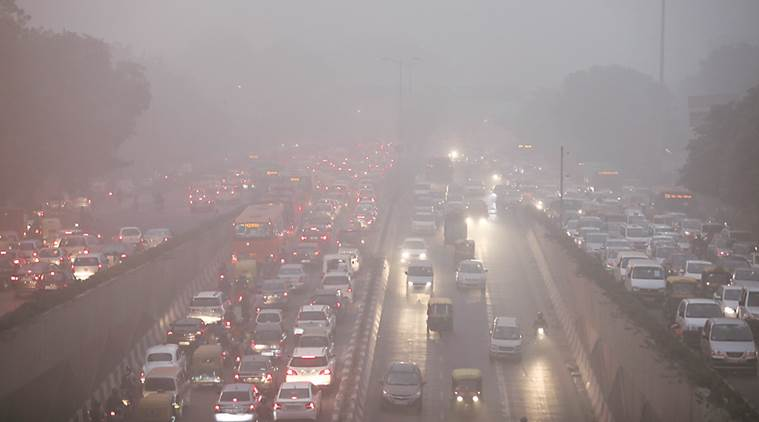

### Also one interesting thing about this dataset is it contains the data of the Major Cities in India and US time-peroid before covid-19 and during covid-19(from Jan-2019 to May-2021)
### The COVID-19 pandemic might have some role to play in bringing some changes to the overall quality of air.
### Here, I mainly focused on the Indian Cities

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import unicodedata
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geoplot as gplt
import geoplot.crs as gcrs
import warnings
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

### Let us read the Csv Files, 
#### *shp_gdf* is the shape file for Indian map which we will use to plot the map of India using geopandas
#### *Latlong* is the data for latitude and longitude for cities which will help us to plot in the map

In [ ]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
data = pd.read_csv("../input/daily-air-quality-dataset-india/air_quality_index.csv")
latlong = pd.read_csv("../input/indian-city-latitude-longitude/India Cities LatLng.csv")

In [ ]:
data.head()

#### Ok, so in this dataset we have two countries India and US, mainly we will focus on the Indian data but let us visualize some data between India and US

In [ ]:
sns.countplot(x='COUNTRY',data=data)

#### Let us create two new columns Year and Months

In [ ]:
data['YEAR'] = pd.DatetimeIndex(data['DATE']).year
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data.head()

In [ ]:
#Getting Country as India
data_INDIA = data.loc[data['COUNTRY'] == 'IN']
#Getting Country as US
data_USA = data.loc[data['COUNTRY'] == 'US']

In [ ]:
#Seeing the distribution of AQI for INDIA
sns.distplot(data_INDIA["VALUE"])

#### Let us see if any outliers are present

In [ ]:
sns.boxplot(x="VALUE", data=data_INDIA)

In [ ]:
#We can see the outliers for Indian DataSet, aqi above 800 is too much, hence we can remove this
data_INDIA = data_INDIA.drop(data_INDIA[(data_INDIA['VALUE']>800)].index)
data = data.drop(data[(data['VALUE']>800)].index)

In [ ]:
sns.catplot(x="VALUE", y="COUNTRY", hue="YEAR", data=data, height=5, aspect=3)

#### From this we can see very interesting thing, that in US almost for 2019 and 2021 the air quality index is same, while in 2020 we can see there is an increase
#### While for India, in 2019(pre-covid) we can see it's more, but for 2020 and 2021 it's much less than of 2019 i.e during-covid time

In [ ]:
Good = len(data_INDIA[(data_INDIA['VALUE']>0) & (data_INDIA['VALUE']<=30)].count(axis=1))
Satisfactory = len(data_INDIA[(data_INDIA['VALUE']>31) & (data_INDIA['VALUE']<=60)].count(axis=1))
Moderately_polluted = len(data_INDIA[(data_INDIA['VALUE']>61) & (data_INDIA['VALUE']<=90)].count(axis=1))
Poor = len(data_INDIA[(data_INDIA['VALUE']>91) & (data_INDIA['VALUE']<=120)].count(axis=1))
Very_poor = len(data_INDIA[(data_INDIA['VALUE']>121) & (data_INDIA['VALUE']<=250)].count(axis=1))
Severe = len(data_INDIA[(data_INDIA['VALUE']>=250)].count(axis=1))
colors = ['lightgreen', 'mediumseagreen', 'yellow', 'orangered', 'darkred', 'red']

Aqi_grp = ['Good','Satisfactory','Moderately Polluted','Poor','Very Poor','Severe']
Aqi_group_val = [Good,Satisfactory,Moderately_polluted,Poor,Very_poor,Severe]

fig = go.Figure(data=[go.Pie(labels=Aqi_grp, values=Aqi_group_val,sort=False,title="AQI Category, Pollutants and Health Breakpoints from Jan 2019 to May 2021 for major Indian Cities",
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

#### As we are dealing with pm2.5, hence we are following the below chart
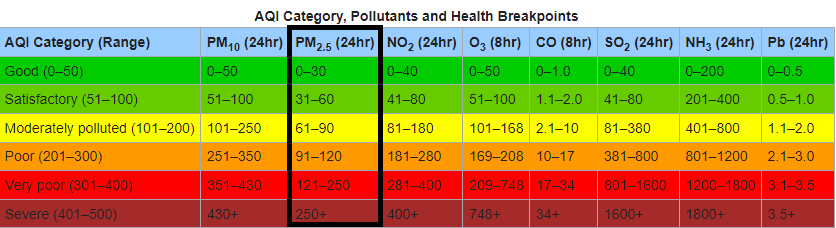

#### We can see that almost half i.e 40.5% of Indian Cities fall in very poor category


In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,9))
Before_Lockdown = data_INDIA.drop(data_INDIA[(data_INDIA.YEAR>2019)].index)
Before_Lockdown.sort_values(by=["CITY"], inplace = True)
sns.scatterplot(x='VALUE',y='CITY',data=Before_Lockdown,ax=axis1).set_title("Before Covid")

After_Lockdown  = data_INDIA.drop(data_INDIA[(data_INDIA.YEAR==2019)].index)
After_Lockdown.sort_values(by=["CITY"], inplace = True)
sns.scatterplot(x='VALUE',y='CITY',data=After_Lockdown,ax=axis2).set_title("During Covid")
fig.set_size_inches(20, 12)


#### From the above plotting, we are assuming that till 2019 december it was post-covid and from 2020 Jan till 2021 May we are assuming it during covid-times
#### We can see from the above chart some interesting readings that in the right figure most of the points have shifted to right meaning lower AQI value w.r.t pm2.5, but also interestingly
#### some places like Thrissur have an increasing value from before and after

In [ ]:
### checking top 10 maximum pollutant cities of India

def max_pollutant_city_beforeLockdown(pollutant):
    polu = Before_Lockdown[[pollutant,"CITY"]].groupby(["CITY"]).mean().sort_values(by = pollutant,ascending = False).reset_index()
    polu[pollutant] = round(polu[pollutant],2)  
    return polu[:10]

def max_pollutant_city_afterLockdown(pollutant):
    polu = After_Lockdown[[pollutant,"CITY"]].groupby(["CITY"]).mean().sort_values(by = pollutant,ascending = False).reset_index()
    polu[pollutant] = round(polu[pollutant],2)  
    return polu[:10]

BeforLockdown_Cities = max_pollutant_city_beforeLockdown("VALUE")
AfterLockdown_Cities = max_pollutant_city_afterLockdown("VALUE")

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,9))
sns.barplot(x = BeforLockdown_Cities["CITY"], y= BeforLockdown_Cities["VALUE"], data = BeforLockdown_Cities, ax=axis1,palette="rocket").set_title("Before Lockdown") 
sns.barplot(x = AfterLockdown_Cities["CITY"], y= AfterLockdown_Cities["VALUE"], data = AfterLockdown_Cities, ax=axis2,palette="rocket").set_title("After Lockdown")
fig.set_size_inches(25, 12)
plt.show()


#### From the above histogram, we have some very interesting data, like Ghaziabad which stays the most polluted and have very little change before and during lockdown peroid,
#### While we can see patna moved from 4th place to 6th place, Chandigarh moved from 10th place to 8th place, while Kolkata moved from 8th to 10th place

In [ ]:
#Now we are changing the month like for first year it will be 1-12, for 2nd - 12-24
#Changing the months for year 2019
data_MF = (data_INDIA[(data_INDIA['MONTH']>0) & (data_INDIA['YEAR']==2020)])
data_MF.loc[28212:59274,'MONTH'] += 12
data_INDIA.loc[28212:59274,'MONTH'] = data_MF

In [ ]:
data_FF = (data_INDIA[(data_INDIA['MONTH']>0) & (data_INDIA['YEAR']==2021)])
data_FF.loc[59282:68987,'MONTH'] += 24
data_INDIA.loc[59282:68987,'MONTH'] = data_FF

In [ ]:
data_INDIA.head()

In [ ]:
px.scatter(data_INDIA, x = "MONTH", y = "VALUE", animation_frame = "MONTH", animation_group = "CITY",
           color = "CITY", size='VALUE',range_x=[1,30], range_y=[0,600],)

#### Here we can see, that during 15th month i.e March 2020 all the bubbles(cities) aqi comes down, this was the time when India's First Lockdown was announced i.e 25 Mar 2020 – 31 May 2020
#### Again in 23rd month i.e November 2020, as lockdowns were eased and due to diwali there is an increase in the AQI value w.r.t pm2.5 and again as the second wave hits the bubbles comes down
#### One more interesting detail is Thrissur has the lowest AQI value among the all and is almost consistent throughout

## *Visualizing using Geopandas* 

#### Creating two new null columns Latitude and Longitude

In [ ]:
data_INDIA["Latitude"] = np.nan
data_INDIA["Longitude"] = np.nan

### In our Excel file the names contains some characters, so let us use some encoding to remove all this

In [ ]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode('utf-8')
#Removing from data_INDIA 
data_INDIA['CITY'] = data_INDIA['CITY'].apply(remove_accents)
#Removing from LatLong dataset
latlong['city'] = latlong['city'].apply(remove_accents)

#### Below, we are checking if the city in our dataset matches with the city in the latitude&longitude dataset, if it matches then we are assigning the latitude and longitude value for that respective city in the empty Latitude and Longitude columns we have earlier declared

In [ ]:
for i in data_INDIA.index:
    if(data_INDIA["CITY"][i] in latlong.city.values):
        x = latlong[latlong['city']==data_INDIA["CITY"][i]].index.values
        data_INDIA["Latitude"][i] = latlong["lat"][x]
        data_INDIA["Longitude"][i] = latlong["lng"][x]

In [ ]:
data_INDIA.head()

### KDE PLOT using geopandas 

In [ ]:
geometry = [Point(xy) for xy in zip(data_INDIA['Longitude'], data_INDIA['Latitude'])]
gdf = GeoDataFrame(data_INDIA, geometry=geometry)
ax = gplt.polyplot(shp_gdf, projection=gcrs.AlbersEqualArea())
ax.set_title("Density of AQI")
gplt.kdeplot(gdf, n_levels=20, cmap='Reds', ax=ax)

# Time Series Analysis

### The simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.

### For a sequence of values, we calculate the simple moving average at time period t as follows:
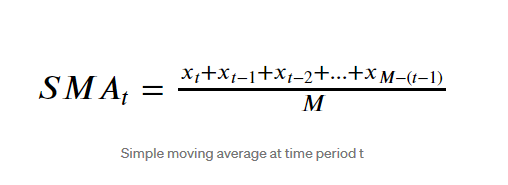

In [ ]:
sns.lineplot(x="MONTH", y="VALUE", data=data_INDIA)

#### Let us have some more clearer and better visualization at the data

In [ ]:
sns.pointplot(x='MONTH',y='VALUE',hue='YEAR',data=data_INDIA)

#### We will calculate the simple moving averge over a peroid of 20months, i.e window size 20

In [ ]:
data_INDIA['VALUE'].rolling(window =20).mean().plot()

In [ ]:
data_INDIA['VALUE'].plot(figsize=(10,6))
data_INDIA['VALUE'].rolling(window =20).mean().plot()


#### Here we can see the yellow line is the moving average and it helps us to smoothen the data and we can see the trend in the data

In [ ]:
data_INDIA['moving_avg'] = data_INDIA['VALUE'].rolling(window =20).mean()
data_INDIA.tail(20)

## Moving Average as Prediction

#### *The moving average value can also be used directly to make predictions.*

#### It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for.

#### The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day.
#### This website explains in more detailed way - https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

#### We will need only the AQI values w.r.t pm2.5 and the months, so we will drop the rest of the column and store it inside a new dataframe which we will use for prediction

In [ ]:
data_avg = data_INDIA.drop(['DATE','COUNTRY', 'CITY', 'YEAR', 'moving_avg', 'Latitude', 'Longitude', 'geometry' ],axis=1)

In [ ]:
data_avg.head()

#### Let us replace the index with the month

In [ ]:
data_avg.set_index('MONTH', inplace=True)
data_avg.index.name = 'Month'
data_avg

#### Let us plot the distribution of the data over the few months from 2019 Jan - 2021 May

In [ ]:
plt.style.use('seaborn')
data_avg.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Distribution of AQI over the past few months', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Value', fontsize=16)

### With a window size of 3, we must shift the series forward by 2 time steps. This is because we want to include the previous two observations as well as the current observation in the moving average in order to predict the next value. We can then calculate the moving average from this shifted series.

In [ ]:
list1 = []
list2 = []
X = data_avg.values
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
#Just for printing the top10 predicted and expected values
counter = 0
print("Printing first 10 values")
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    ##Uncomment below code to see the predicted and expected value
    if(counter<10):   
        print('predicted=%f, expected=%f' % (yhat, obs))
    list1.append(yhat)
    list2.append(obs)
    counter+=1
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


In [ ]:
np.sqrt(mean_squared_error(list1,list2))

### Let us see the plot and see 

#### *Here the expected value is in blue and the red is our predictions*

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### As there are so many values, let us look at the top 100 expected and predicted values 

In [ ]:
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

### This model can be further improved and optimized using various other time series analysis, I will learn and explore some more and will update this also. Please Upvote if you like and leave a comment :D